# Preprocesamiento

En esta cuarta etapa se van a tomar decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [2]:
#dataset de referencia 
deps = DataSet('dsualmh.h5')

elec=deps.buildings[1].elec # Todos los medidores



labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Incandescent Lamp','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

Veamos si hay  seccion faltante

In [4]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2023-06-06 11:19:19+02:00', end='2023-06-06 11:40:28+02:00', empty=False)

Muestreo cada 10 segundos, promediando datos (mean) como metodo de relleno y usando el primer dato

In [3]:
ta = '2023-06-09 09:34:38+01:00' #tiempo inicial
tb = '2023-06-09 13:36:19+01:00' #tiempo final

next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity            current   voltage     power   voltage            \
type                                 armonic15 armonic45 armonic39 armonic27   
2023-06-09 10:34:40+02:00  14.862400  0.210352  0.000098  0.022870  0.080526   
2023-06-09 10:34:50+02:00  14.857520  0.238818  0.000145  0.010613  0.075182   
2023-06-09 10:35:00+02:00  14.864580  0.253081  0.000080  0.020983  0.074278   
2023-06-09 10:35:10+02:00  14.848100  0.273547  0.000036  0.030184  0.076298   
2023-06-09 10:35:20+02:00   7.410930  0.305314  0.000146  0.027722  0.083273   
...                              ...       ...       ...       ...       ...   
2023-06-09 13:35:30+02:00   0.848687  0.376430 -0.000012  0.087885  0.193820   
2023-06-09 13:35:40+02:00   0.850942  0.359201  0.000013  0.102699  0.191645   
2023-06-09 13:35:50+02:00   0.132160  0.313441 -0.000087  0.096128  0.182872   
2023-06-09 13:36:00+02:00   0.131754  0.322902 -0.000024  0.109934  0.182729   
2023-06-09 13:36:10+02:00   0.135074  0.312083 -0.000069  0.081149  0.175497   

physical_quantity           current   voltage                   power  \
type                      armonic48 armonic34 armonic10     armonic38   
2023-06-09 10:34:40+02:00  0.001056  0.009440  0.032609  1.560000e-05   
2023-06-09 10:34:50+02:00  0.001025  0.012493  0.032954  8.400000e-06   
2023-06-09 10:35:00+02:00  0.001040  0.008696  0.038034  2.600000e-06   
2023-06-09 10:35:10+02:00  0.001498  0.012625  0.046915  1.600000e-05   
2023-06-09 10:35:20+02:00  0.001078  0.015185  0.027272  9.999999e-07   
...                             ...       ...       ...           ...   
2023-06-09 13:35:30+02:00  0.000761  0.022989  0.026913  8.000000e-07   
2023-06-09 13:35:40+02:00  0.000436  0.013398  0.044861  6.000000e-07   
2023-06-09 13:35:50+02:00  0.001400  0.021092  0.034099 -2.400000e-06   
2023-06-09 13:36:00+02:00  0.000566  0.015101  0.030282 -2.600000e-06   
2023-06-09 13:36:10+02:00  0.001089  0.017016  0.027949  1.020000e-05   

physical_quantity           current  ...   voltage                      \
type                       armonic2  ... armonic36  armonic2 armonic50   
2023-06-09 10:34:40+02:00  0.013528  ...  0.017966  0.051978  0.008131   
2023-06-09 10:34:50+02:00  0.012389  ...  0.011617  0.049494  0.007989   
2023-06-09 10:35:00+02:00  0.013886  ...  0.011005  0.052239  0.010954   
2023-06-09 10:35:10+02:00  0.014085  ...  0.010751  0.054567  0.012669   
2023-06-09 10:35:20+02:00  0.012597  ...  0.009119  0.072377  0.010922   
...                             ...  ...       ...       ...       ...   
2023-06-09 13:35:30+02:00  0.004014  ...  0.020176  0.037736  0.009190   
2023-06-09 13:35:40+02:00  0.003691  ...  0.019103  0.093098  0.005650   
2023-06-09 13:35:50+02:00  0.002225  ...  0.021217  0.076844  0.006632   
2023-06-09 13:36:00+02:00  0.001631  ...  0.019943  0.089618  0.009083   
2023-06-09 13:36:10+02:00  0.003271  ...  0.013777  0.067783  0.008410   

physical_quantity           current   voltage     power             current  \
type                       armonic4 armonic12  armonic3 armonic32 armonic15   
2023-06-09 10:34:40+02:00  0.006434  0.014921  0.145019  0.000023  0.018575   
2023-06-09 10:34:50+02:00  0.005982  0.026662  0.136573  0.000004  0.017870   
2023-06-09 10:35:00+02:00  0.007211  0.030141  0.134235  0.000016  0.016500   
2023-06-09 10:35:10+02:00  0.006363  0.025673  0.142376 -0.000007  0.019585   
2023-06-09 10:35:20+02:00  0.007191  0.022912  0.118530  0.000006  0.041859   
...                             ...       ...       ...       ...       ...   
2023-06-09 13:35:30+02:00  0.004393  0.026067  0.041216  0.000012  0.070870   
2023-06-09 13:35:40+02:00  0.004082  0.027499  0.042783  0.000005  0.069464   
2023-06-09 13:35:50+02:00  0.002957  0.023586  0.027257 -0.000004  0.019471   
2023-06-09 13:36:00+02:00  0.001855  0.018555  0.028850 -0.000009  0.020449   
2023-06-09 13:36:10+02:00  0.002382  0.023961  0.025748 -0.000005  0.021692   

physical_quantity 

# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

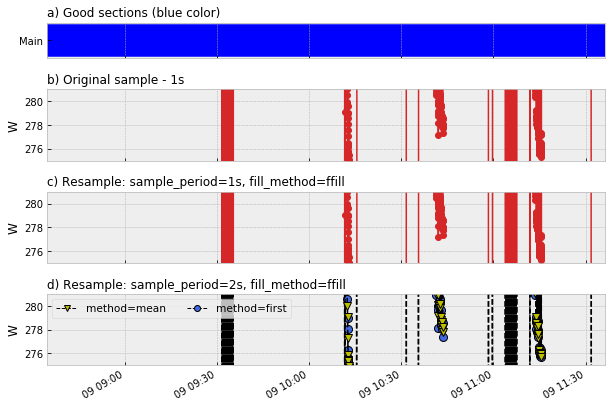

In [4]:
rcParams['figure.figsize'] = (10, 7)



#contador principal
Main=elec.select(instance=[1])

#definición de  gráficas
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})


#sample a segundo
elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')

ax1.set_ylim(275,281)


#sample a 1 segundo metodo fill
elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')

ax2.set_ylim(275,281)



#sample a 2 segundos metodo fill
elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)


#good sections
import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

Vamos a filtrar por aquellos dispositivos cuya potencia activa sea superior a 5,85kwh

In [5]:
Devices=elec.select(instance=[2,3,4,5,6,7,8,9,10,11]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

Series([], Name: active, dtype: float64)

Vemos  el top-k entre los dispositivos electricos conectados

In [6]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
Devices.select_top_k(k=5)

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [7]:
train = DataSet('dsualmh.h5')

train.set_window(start="2023-06-09 09:34:00", end="2023-06-09 12:54:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2023-06-09 09:34:38+02:00', end='2023-06-09 12:54:00+02:00', empty=False)

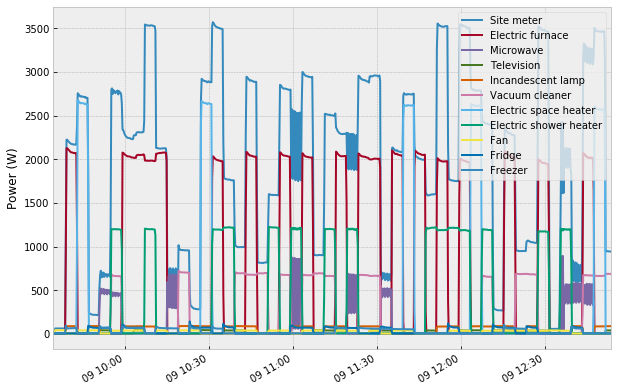

In [8]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [9]:
 #Validación 

valid = DataSet('dsualmh.h5')

valid.set_window(start="2023-06-09 12:55:00", end="2023-06-09 13:36:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2023-06-09 12:55:00+02:00', end='2023-06-09 13:36:00+02:00', empty=False)

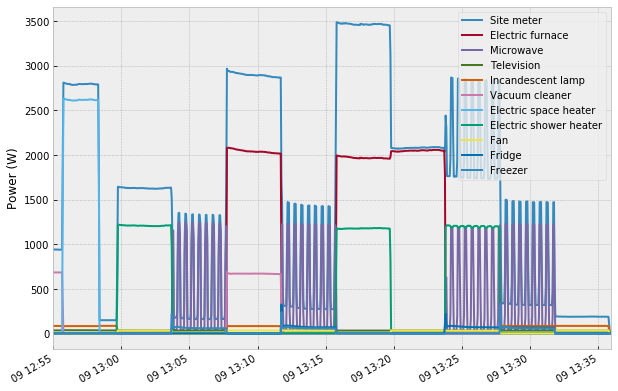

In [10]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [11]:
test = DataSet('dsualmh_test.h5') #Pruebas

test.set_window(start="2023-06-06 11:19:19", end="2023-06-06 11:40:28")

test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2023-06-06 11:19:19+02:00', end='2023-06-06 11:40:28+02:00', empty=False)

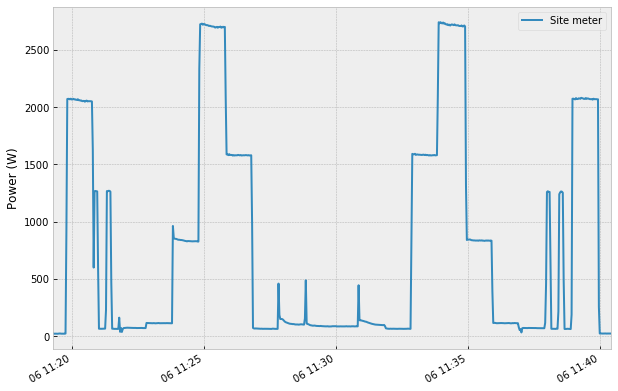

In [12]:
test_elec.mains().plot()